## 학습 목표
- 레이어의 개념을 이해한다.
- 딥러닝 모델 속 각 레이어(Linear, Convolution)의 동작 방식을 이해한다.
- 데이터의 특성을 고려한 레이어를 설계하고, 이를 Tensorflow로 정의하는 법을 배운다.

## 데이터의 형태

#### Q1. 해상도가 1280 x 1024(30fps)이고 러닝타임(T)이 90분인 흑백 영화 데이터는 어떻게 표현할 수 있을까요? 표기는 (T, C, H, W)를 따라주세요.

> (162000, 1, 1024, 1280)  
> Time: 90분 x 60초 x 30fps Channel: 흑백 영화는 단일 채널로 이루어진다. Height: 1024 Width: 1280

이외에 테이블 데이터나 이미지의 경우 RGB 3채널로서 (C, W, H) 혹은 (W, H, C)로 표현하기도 한다.

## Linear 레이어

- 데이터를 선형변환을 통해 특정 차원으로 변환시켜준다.

#### 예) 2차원의 점 4개(x,y로 표현 가능)를 통해 결국 1개의 정수(클래스)를 나타내는 선형 변환을 만들어본다.
> <식1>  
> 1단계: (4, 2) x (2, 1) 행렬 = (4, )  
> 2단계: (4, ) x (4, 1) 행렬 = (1, )  




- 위와 같이 하면 점 4개, 즉 4각형을 하나의 정수로 표현할 수 있게 된다.
- 2차원을 1차원으로 변환하는 데에 (2, 1) 혹은 (2 x 1) 행렬이 하나 선언되고,  
- 4차원을 1차원으로 변환하는 데에 (4, 1) 혹은 (4 x 1) 행렬이 하나 선언됨에 유의한다.
- #### 그리고 여기서 행렬들은 Weight을 나타낸다.
- #### Linear 레이어는 `(입력의 차원, 출력의 차원)`에 해당하는 Weight을 가지는 특성이 있다.

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


![](https://images.velog.io/images/moondeokjong/post/35f1218f-6c3b-4f34-aa50-faf69faf77a3/Screenshot%202022-02-07%20at%2010.56.56%20AM.png) _- 출처 : 아이펠_

근데 이렇게 보면 2개의 다른 사각형이 첫번째 선형변환 후 같아져 버리기 때문에 저 첫번째 weight은 올바르지 않은 weight임

그래서 데이터를 집약하기 전에 한 번 풍부하게 해본다!

-----------------------------------
-----------------------------------
-----------------------------------

In [2]:
tf.zeros((24,))

<tf.Tensor: shape=(24,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [3]:
tf.zeros((24))

<tf.Tensor: shape=(24,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [4]:
tf.zeros((24, 1))

<tf.Tensor: shape=(24, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [5]:
tf.zeros((1, 24))

<tf.Tensor: shape=(1, 24), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [6]:
tf.keras.layers.Dense(1)(tf.zeros((24,1)))

<tf.Tensor: shape=(24, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [7]:
tf.keras.layers.Dense(1)(tf.zeros((1,24)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

#### 위와 같이 테스트하면서 squeeze 안 해보기

In [8]:
t_boxes = tf.zeros((64, 4, 2))
print(f't_boxes.shape: {t_boxes.shape}')
print('===========================')

linear_1 = tf.keras.layers.Dense(1)
out_1 = linear_1(t_boxes)
print(f'out_1.shape: {out_1.shape}')
print(f'weight 형태: {linear_1.weights[0].shape}')
print('===========================')

linear_2 = tf.keras.layers.Dense(1)
out_2 = linear_2(out_1)
print(f'out_2.shape: {out_2.shape}')
print(f'weight 형태: {linear_2.weights[0].shape}')
print('===========================')


t_boxes.shape: (64, 4, 2)
out_1.shape: (64, 4, 1)
weight 형태: (2, 1)
out_2.shape: (64, 4, 1)
weight 형태: (1, 1)


#### flatten()해서 할 경우

In [9]:
f_boxes = tf.zeros((64, 4, 2))
print(f'f_boxes.shape: {f_boxes.shape}')
print('===================================')
fl = tf.keras.layers.Flatten()
out_1 = fl(f_boxes)
print(f'After flatten - out_1.shape: {out_1.shape}')
print('===========================')

linear_1 = tf.keras.layers.Dense(1)
out_2 = linear_1(out_1)
print(f'After dense - out_2.shape: {out_2.shape}')
print(f'weight 형태: {linear_1.weights[0].shape}')
print('===========================')

f_boxes.shape: (64, 4, 2)
After flatten - out_1.shape: (64, 8)
After dense - out_2.shape: (64, 1)
weight 형태: (8, 1)


In [10]:
# 4차원 flatten해보기

im = tf.zeros((64, 1920, 1080, 3))
im_out = tf.keras.layers.Flatten()(im)
print(im_out.shape)

(64, 6220800)


In [11]:
# (64,8)에서 flatten을 한 번 더 하면?

t = tf.zeros((64, 8))
print(f'Before flat - shape: {t.shape}')
print('======================================')

ff = tf.keras.layers.Flatten()
double_flat = ff(t)
print(f'After flat - shape: {double_flat.shape}')


Before flat - shape: (64, 8)
After flat - shape: (64, 8)


In [12]:
# 그냥 3차원만 2차원으로 줄여주나?
z = tf.zeros((64, 8, 10))
print(z.shape)

(64, 8, 10)


In [13]:
fff = tf.keras.layers.Flatten()
zz = fff(z)
print(zz.shape)

(64, 80)


In [14]:
ffff = tf.keras.layers.Flatten()
zzz = ffff(zz)
print(zzz.shape)

(64, 80)


In [15]:
# 혹시 2차원을 Dense(1)에 넣으면?
d = tf.keras.layers.Dense(1)
a = d(zzz)
print(a.shape)

(64, 1)


#### 여튼 벡터인데, 행렬의 모습을 가진 벡터로 나온다...

In [16]:
# squeeze 해줘보자
aa = tf.squeeze(a)
print(aa.shape)

(64,)


#### 차원에 정보가 있는데 그냥 squeeze를 한다면..?

In [17]:
print(zz.shape)
szz = tf.squeeze(zz)
print(szz.shape)

(64, 80)
(64, 80)


-----------------------------------
-----------------------------------
-----------------------------------

#### 데이터를 한 번 풍부하게 늘린 후에 다시 집약하는 형태로 가보자!
> <식2>  
> 1단계: (4, 2) x (2 x 3) 행렬 = (4, 3)  
> 2단계: (4, 3) x (3 x 1) 행렬 = (4, )  
> 3단계: (4, ) x (4 x 1) 행렬 = (1, )  

![](https://images.velog.io/images/moondeokjong/post/db6f3b15-9ff6-4159-913e-84967aea6b10/Screenshot%202022-02-07%20at%2011.00.19%20AM.png) _- 출처 : 아이펠_

이렇게 하니 조금씩 독립적인 정보가 생겨난다.

In [18]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

########
# Step 1: (4,2)차원인 boxes를 (4,3)으로 확장시키는 Linear Layer를 활용하세요.
# Enter Your Source
first_linear = tf.keras.layers.Dense(3, use_bias=False)
first_out = first_linear(boxes)

########

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

########
# Step 2: 4차원인 second_out을 하나의 실수으로 집약시키는 Linear Layer를 활용하세요.
# Enter Your Source
third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)
########

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

########
# Step 3: 모든 params를 더하여 total_parmams를 구하세요.
# Enter Your Source
total_params = first_linear.count_params() + second_linear.count_params() + third_linear.count_params()

########

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


> 이런 식으로 적절한 Weight의 형태를 선언해주면, 컴퓨터가 해당 Weight을 임의의 실수로 채우면서 적절한 Weight을 찾아가는게 바로 훈련  
> 적절한 파라미터는 결국 훈련 데이터의 분포에 따라 달라진다.  
> 즉, test 데이터와 다른 분포로 훈련된다면 적절하지 않은 파라미터 값으로 수렴할 것이다.

## Convolutional 레이어

> <식 4>  
> 1단계: (1920, 1080, 3) x [3 x 16 x 5 x 5 Weight & Stride 5] = (384, 216, 16)  
> 2단계: (384, 216, 16) → (384 x 216 x 16, )  
> 3단계: (1327104, ) x [1327104 x 1 Weight] = (1, )  
> <식 4>는 16개의 5 x 5 필터를 가진 Convolution 레이어를 정의하여 이미지를 Stride 5로 훑었고, 그렇게 생성된 출력을 1차원으로 펼쳐 Linear 레이어로 정보를 집약함

#### Q4. 하지만 그럼에도 <식 4>를 따라 정의한 신경망은 손을 찾는 데에 적합하지 않을 수도 있습니다. 이유가 무엇일까요? (힌트는 필터에 있습니다!)
> 1) 1920 x 1080 인 입력 데이터 크기에 비해 5 x 5는 손이라는 객체를 판별해 낼 수 있을 만큼 유의미한 정보를 담기에는 작은 필터 사이즈일 가능성이 높다. 입력의 크기를 줄이거나 필터 크기를 키울 필요가 있다.  
> 2) 필터의 크기와 Stride를 같게 하면 손이 필터의 경계선에 걸리는 경우, 정상적으로 인식하지 못할 수 있다. Stride를 줄여 이미지를 더 자세하게 살피도록 설계하자.

> 그렇다면 필터 사이즈를 훨씬 크게 하는 게 답? 그렇지 않다.  
> 만약 극단적으로 필터 사이즈를 이미지 사이즈와 동일하게 한다면,  
> 그 순간 우리의 Convolution 레이어는 완벽하게 Linear 레이어와 같아지게 된다.  
> 필터 사이즈를 키우게 되면 파라미터 사이즈와 연산량이 커질 뿐 아니라, Accuracy도 떨어지게 될 가능성이 높다

In [46]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

ResourceExhaustedError: OOM when allocating tensor with shape[64,1920,1080,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]

## Pooling 레이어

## Deconvolution 레이어

- Convolution으로 집약된 데이터가 정보 손실 측면에서 정말 유의미한 데이터가 되는지 확인해보자

> - 패키지 임포트 및 MNIST 데이터셋 로딩  
> - AutoEncoder 모델 구성  
> - AutoEncoder 모델 훈련  
> - AutoEncoder Reconstruction Test  

In [21]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


> 라벨 정보를 버리는데, 이유는 Image Reconstruction 시 라벨은 사실 x 자신이 되기 때문이다.

----------------------
----------------------
----------------------

In [24]:
(xx, yy), (x, y) = mnist.load_data()

print(xx.shape)

(60000, 28, 28)


----------------------
----------------------
----------------------

In [25]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

#### 설명

1. y_train이 들어가야 할 자리에 x_train이 들어가 있음을 유의해 주십시오.
2. 그리고 loss로 주로 분류 모델에서 사용되는 binary_crossentropy를 사용해서 다소 의아할 것입니다.
3. 그러나 모든 dim에서 0~1 사이의 값을 가지는 입력 데이터와 출력 데이터(마지막 출력이 sigmoid로 제어되고 있음에 유의합시다) 사이의 분포가 최대한 유사하기를 바라기 때문에 이 loss는 타당합니다.

In [36]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 15s 42ms/step - loss: 0.6972 - val_loss: 0.6958
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6953 - val_loss: 0.6938
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6933 - val_loss: 0.6916
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6910 - val_loss: 0.6891
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6884 - val_loss: 0.6862
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6853 - val_loss: 0.6825
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6814 - val_loss: 0.6776
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6759 - val_loss: 0.6704
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6677 - val_loss: 0.6585
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6539 - val_l

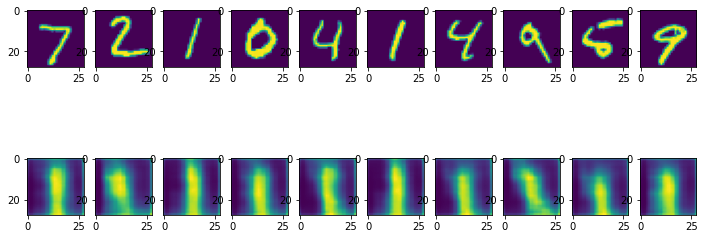

In [37]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

> 결과가 정확하진 않지만, 동일한 구조의 decoder로 훌륭하게 deconvolution할 수 있기 때문에 다른 요인이 있다는 정도로만 알고 넘어가자

In [38]:
x_test_imgs.shape

(10, 28, 28)

---------------------
---------------------
---------------------

#### `padding='valid'`, `padding='same'` 차이 살펴보기

In [26]:
x = tf.constant([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

In [27]:
x

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [30]:
x = tf.reshape(x, (1, 3, 3, 1))

In [31]:
x

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]]], dtype=int32)>

In [34]:
tm = tf.keras.layers.MaxPooling2D((2,2), strides=2, padding='valid')
tm(x)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=int32, numpy=array([[[[5]]]], dtype=int32)>

In [35]:
tm = tf.keras.layers.MaxPooling2D((2,2), strides=2, padding='same')
tm(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[5],
         [6]],

        [[8],
         [9]]]], dtype=int32)>

### Transposed Convolution

- 사실 위의 모델은 deconvolution이 아니라, 엄밀히 따지면
- 인코더와 동일한 convolution 모델을 사용했기에 정방향의 convolution 연산을 통해 이미지 재생산을 흉내낸 것임.
- 진짜는 수학적 역연산이 되어야 함.
- 그래서 진짜 deconvolution 하는 아래의 모델로 확인해보자

In [39]:
from tensorflow.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 

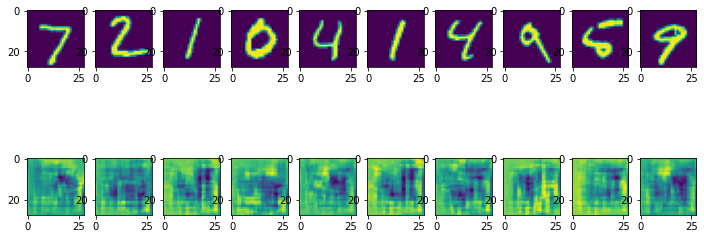

In [40]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

> 위는 내가 실수로 훈련하지 않고 그냥 predict했을 때의 모습이다.  
> 아마 weight이 임의로 선정되어 있는 초기값 상태이지 않을까 싶다.

In [41]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 60s 155ms/step - loss: 0.6909 - val_loss: 0.6903
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6901 - val_loss: 0.6895
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6892 - val_loss: 0.6884
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6881 - val_loss: 0.6871
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6867 - val_loss: 0.6855
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6850 - val_loss: 0.6835
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6829 - val_loss: 0.6810
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6801 - val_loss: 0.6777
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6765 - val_loss: 0.6731
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6715 - val_

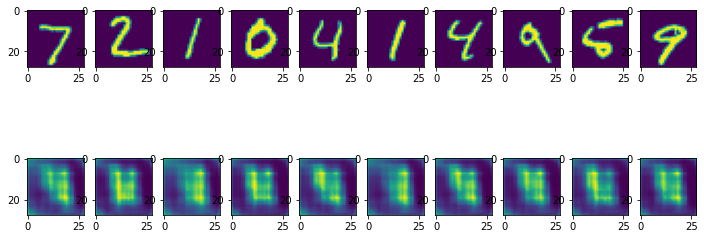

In [42]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])